In [3]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

In [4]:
# units are Msun, year
pi = np.pi
c2 = 3.993953869e9 
k2 = 4*pi*pi # au^3/(Msun*yr^2)
pctoau = 206264.806

# min and mas should be the saturn's SMA range 
# (say from 0.02au to the location of our own Saturn, 9.6)
#0.02>9.6 corresponds to 10^-2 to 10^2
len=50 # 100
min = -2
max = 2
d = (max-min)/(len-1)

# original method to initialize a1
a1lg = np.arange(min,max+d,d)
a1 = 10**a1lg

### maybe have few e2?
e2 = 0.4
 
dt = 9/(len-1)
tveclg = np.arange(1,11,dt)

m1 = 1.03 #1. ## this should be the mass of the host star
m2 = 1.43e-4#20e-6 # this should be the mass of the warm Saturn
# 5.4e-4
m3= 1 #9.548e-4, 9.548e-2, 0.1, 1

In [11]:
def get_timescales(a2):
    
    k2 = 4*pi*pi
    # maybe have a couple of a2

    ## Quad - EKL timescale 
    # ex 1.4 #text editor?
    # lt 0 #linestyle='-'
    tquad=2*pi*a2**3*(1-e2*e2)**(3/2.)*np.sqrt(m1+m2)/(a1**(3/2.)*m3*np.sqrt(k2))
    tquadlg=np.log10(tquad)

    ## stability of EKL 
    a1epsi=0.1*a2*(1-e2*e2)/e2 *tveclg/tveclg # is this supposed to be in here twice?
    #ctype black # set color to black?

    ## GR (1PN) precession 
    e1R=0
    tPNa1=2*pi*a1**(5/2.)*c2*(1-e1R*e1R)/(3*np.sqrt(k2**3)*(m1+m2)**(3/2.))
    tPNa1lg=np.log10(tPNa1)
    #ctype lblue # set color to blue?
    #lt 0 # linestyle = '-'

    ##################################################################################
    TV1= 50. 
    TV2= 0.015 

    ## : Eggleton's Q, not dissipative quality factor.
    Q1=0.028
    Q2=0.16666 ##0.3333
    #"Gyroradii":  I = alpha * M * R^2  
    alpha1=0.08
    alpha2=0.26

    kL1= 0.0288066
    #0.5*Q1/(1.-Q1)
    kL2=5e-5
    #0.5*Q2/(1.-Q2)

    Rsun=695500*6.68459e-9 ##AU
    R1=1*Rsun
    R2=0.045*Rsun #4e-6*Rsun ## This is about 4 R_earth, check to have the radius of the planet 

    QoftV1=4.*kL1*4.*pi*pi*m1*(1./365.)*TV1/(3.*(1.+2.*kL1)*(1.+2.*kL1)*R1*R1*R1*2.*pi)
    QoftV2=4.*kL2*4.*pi*pi*m2*(1./365.)*TV2/(3.*(1.+2.*kL2)*(1.+2.*kL2)*(R2*R2*R2)*2.*pi)
    print('%.2E' % Decimal(QoftV1), '%.2E' % Decimal(QoftV2))

    tF1=TV1  *(a1/R1)**8*(m1*m1)/ ( 9.*(m1+m2)*m2*(1+2.*kL1)**2)
    tF2=TV2  *(a1/R2)**8*(m2*m2)/ ( 9.*(m1+m2)*m1*(1+2.*kL2)**2)

    e1=0.001
    e1_2=e1*e1
    e1_4=e1*e1*e1*e1
    e1_6=e1_2*e1_2*e1_2
    e1_8=e1_4*e1_4
    k2=4*pi*pi

    spin1=4
    spin2=4
    #24

    spin1=2.*pi*365.25/spin1
    spin2=2.*pi*365.25/spin2
    beta =0
    spin1h=spin1*np.cos(beta) #radians or degrees? assuming here beta is in deg
    spin1q =np.sqrt(( (spin1*spin1)-(spin1h*spin1h))/2. )
    spin1e=spin1q

    spin2h=spin2
    spin2q =np.sqrt(( (spin2*spin2)-(spin2h*spin2h))/2. )
    spin2e=spin2q

    P1 = 2*pi*np.sqrt(a1*a1*a1/(k2*(m1+m2)))
    n = 2.*pi/P1
    ## //paramters for the spins
    In1=alpha1*m1*R1*R1
    In2=alpha2*m2*R2*R2
    mu=m1*m2/(m1+m2)

    V1= 9.*( (1. +15./4. *e1_2 +15./ 8. *e1_4+ 5./64. *e1_6)/(1.-(e1*e1))**(13./2.) - 11.* spin1h / (18. * n )*( 1. + 3./2. * e1_2 + e1_4/8.)/(1-e1_2)**(5) ) / tF1

    V2= 9.*( (1. +15./4. *e1_2 +15./ 8. *e1_4+ 5./64. *e1_6)/(1.-e1_2)**(13./2.) - 11.* spin2h / (18. * n )*( 1. + 3./2.* e1_2 + e1_4/8.)/(1-e1_2)**(5) ) / tF2

    W1= ( (1. +15./2. *e1_2 +45./ 8. *e1_4+ 5./16. *e1_6)/(1.-e1_2)**(13./2.) - spin1h / ( n )*( 1. + 3.* e1_2 + 3. *e1_4/8.)/(1-e1_2)**(5) ) / tF1

    W2= ( (1. +15./2. *e1_2 +45./ 8. *e1_4+ 5./16. *e1_6)/(1.-e1_2)**(13./2.) - spin2h / ( n )*( 1. + 3.* e1_2 + 3. *e1_4/8.)/(1-e1_2)**(5) ) / tF2 

    X1= -(R1/a1)**(5) *kL1*m2/(mu *n ) *spin1h*spin1e/((1-e1_2)*(1-e1_2)) - spin1q / (2. *n *tF1 ) *( 1. +9. /2. * e1_2 + 5./ 8. *e1_4 )/(1.-e1_2)**(5)

    Y1= -(R1/a1)**(5) *kL1*m2/(mu *n ) *spin1h*spin1q/((1-e1_2)*(1-e1_2)) + spin1e / (2. *n *tF1 ) *( 1. +3. /2. * e1_2 + 1./ 8. *e1_4 )/(1.-e1_2)**(5)

    Z1= (R1/a1)**(5) *kL1*m2/(mu *n ) * ( (2* (spin1h*spin1h)- (spin1q*spin1q)- (spin1q*spin1q) )/ (2.* (1-e1_2)*(1-e1_2) )+ 15. * k2 *m2 / a1**(3)*( 1. +3. /2. * e1_2 + 1./ 8. *e1_4 )/(1.-e1_2)**(5))

    X2= -(R2/a1)**(5) *kL2*m1/(mu *n ) *spin2h*spin2e/((1-e1_2)*(1-e1_2)) - spin2q / (2. *n *tF2 ) *( 1. +9. /2. * e1_2 + 5./ 8. *e1_4 )/(1.-e1_2)**(5)

    Y2= -(R2/a1)**(5) *kL2*m1/(mu *n ) *spin2h*spin2q/((1-e1_2)*(1-e1_2)) + spin2e / (2. *n *tF2 ) *( 1. +3. /2. * e1_2 + 1./ 8. *e1_4 )/(1.-e1_2)**(5)

    Z2= (R2/a1)**(5) *kL2*m1/(mu *n ) * ( (2* (spin2h*spin2h)- (spin2q*spin2q)- (spin2q*spin2q) )/ (2.* (1-e1_2)*(1-e1_2))+ 15. * k2 *m1 / a1**(3)*( 1. +3. /2. * e1_2 + 1./ 8. *e1_4 )/(1.-e1_2)**(5))  

    ## delta e_1/ e1 =2 #not sure what this delta means?
    ## circulization timescale due to tides on the star +planet
    eedot=np.abs(1/(V1+V2))
    eedot=np.abs(1/(V2))
    te1lg=np.log10(eedot)

    #lt 0 # linestyle='-'

    #ctype green #color='g'
    #plt.plot(a1, te1lg, color='green', linestyle='-') #should this be commented out?

    ## circulization timescale due to tides on the star
    eedotStar = np.abs(1/(V1))
    te1lgStar = np.log10(eedotStar)
    #lt 2 #linestyle='--'
    #lw 4 #set linewidth=4
    #ctype red # set color to red
    #connect a1 te1lgStar #is this line supposed to be commented out?
    #lw 3 #set linewidth-3

    ## circulization timescale due to tides on the planet
    eedotPlanet=np.abs(1/(V2))
    te1lgPlanet=np.log10(eedotPlanet)
    #lt 0 #linestyle='-'
    #ctype brown #set color=brown
    #lw 3 #set linewidht=3

    #relocate 1.2 9.1 #set current position
    #label t_{circ}
    #plt.annotate(r'$t_o$', (1.2,9.1))

    ## shrinking of the planet's SMA timescale  due to tides on the planet + star 
    #set ta1=abs(1/((W1+W2)+(V1+V2)*2*e1*e1/(1-e1_2)))

    ## shrinking of the planet's SMA timescale  due to tides on the planet 
    ta1=np.abs(1/((W2)+(V2)*2*e1*e1/(1-e1_2)))
    ta1lg=np.log10(ta1)

    g1=0
    i1=40*3.14/180
    BigOmegadot=((X1+X2)*np.sin(g1) + (Y1+Y2)*np.cos(g1) )/(np.sin(i1))
    tg1=np.abs(2*3.14/(Z1+Z2-BigOmegadot*np.cos(i1)))
    tg1lg=np.log10(tg1)

    ## the precession of the orbit due to tides 
    #ctype purple #set color to purple
    #plt.plot(a1, tg1lg, color='purple', label='precession due to tides')
#    return tquadlg, tPNa1lg, te1lgPlanet, ta1lg
    return tquad, tPNa1, eedotPlanet, ta1

3.03E+05 2.69E-01
3.03E+05 2.69E-01


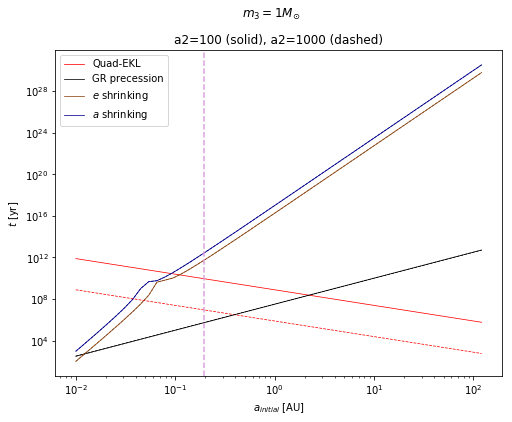

In [12]:
plt.figure(figsize=(8,6))
tquadlg_1000, tPNa1lg_1000, te1lgPlanet_1000, ta1lg_1000 = get_timescales(1000)
plt.semilogy(a1, tquadlg_1000, color='r', linestyle='-', label='Quad-EKL', linewidth=0.75)
plt.semilogy(a1, tPNa1lg_1000, color='k', linestyle='-', label='GR precession',linewidth=0.75)
plt.semilogy(a1, te1lgPlanet_1000, color='saddlebrown', linestyle='-', label='$e$ shrinking', linewidth=0.75)
plt.semilogy(a1, ta1lg_1000, color='DarkBlue', linestyle = '-', label='$a$ shrinking',linewidth=0.75)

tquadlg_100, tPNa1lg_100, te1lgPlanet_100, ta1lg_100 = get_timescales(100)
plt.semilogy(a1, tquadlg_100, color='r', linestyle='--', linewidth=0.75)
plt.semilogy(a1, tPNa1lg_100, color='k', linestyle='--', linewidth=0.75)
plt.semilogy(a1, te1lgPlanet_100, color='saddlebrown', linestyle='--', linewidth=0.75)
plt.semilogy(a1, ta1lg_100, color='DarkBlue', linestyle = '--', linewidth=0.75)

plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$a_{initial}$ [AU]')
plt.ylabel(r'$t$ [yr]')
plt.axvline(x=0.197, linestyle='--', color='plum')
plt.legend()#bbox_to_anchor=(1.1,0.75))
plt.suptitle('$m_3 = 1M_{\odot}$')
plt.title('a2=100 (solid), a2=1000 (dashed)')
plt.savefig('timescales_m3=1M$_{\odot}$.png')

In [30]:
ls *.png

timescales_m3=0.1M$_{\odot}$.png  timescales_m3=1M$_{\odot}$.png
timescales_m3=100Mj.png           timescales_m3=1Mj.png


In [34]:
mv timescales*.png figures